## 1. 결정 트리

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df=pd.read_csv("table.csv")

df.head(3)

,lake_num,bay_num,lid_num,bay_above_bay,lid_right_of_bay,bay_above_lake,lid_bottom_of_image,class_bottom_of_image
0,1,0,0,F,F,F,F,0
1,1,0,0,F,F,F,F,0
2,0,0,0,F,F,F,F,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   lake_num               42 non-null     int64 
 1   bay_num                42 non-null     int64 
 2   lid_num                42 non-null     int64 
 3   bay_above_bay          42 non-null     object
 4   lid_right_of_bay       42 non-null     object
 5   bay_above_lake         42 non-null     object
 6   lid_bottom_of_image    42 non-null     object
 7   class_bottom_of_image  42 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.8+ KB


In [17]:
df = df.replace('(.*)F(.*)', 0, regex=True)
df = df.replace('(.*)T(.*)', 1, regex=True)

In [18]:
df.loc[df["bay_above_bay"]=="F","bay_above_bay"]=0
df.loc[df["bay_above_bay"]=="T","bay_above_bay"]=1
df.loc[df["lid_right_of_bay"]=="F","lid_right_of_bay"]=0
df.loc[df["lid_right_of_bay"]=="T","lid_right_of_bay"]=1
df.loc[df["bay_above_lake"]=="F","bay_above_lake"]=0
df.loc[df["bay_above_lake"]=="T","bay_above_lake"]=1
df.loc[df["lid_bottom_of_image"]=="F","lid_bottom_of_image"]=0
df.loc[df["lid_bottom_of_image"]=="T","lid_bottom_of_image"]=1

df.head(10)

,lake_num,bay_num,lid_num,bay_above_bay,lid_right_of_bay,bay_above_lake,lid_bottom_of_image,class_bottom_of_image
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,2,2,0,1,0,1,2
4,0,2,2,1,0,0,0,3
5,1,1,1,0,0,0,1,4
6,1,1,1,0,1,1,0,6
7,0,2,2,1,1,0,0,2
8,0,2,2,1,1,0,1,4
9,0,1,1,0,0,0,0,7


In [19]:
train=df[["lake_num","bay_num","lid_num","bay_above_bay","lid_right_of_bay","bay_above_lake","lid_bottom_of_image","class_bottom_of_image"]]


In [20]:
X=train[["lake_num","bay_num","lid_num","bay_above_bay","lid_right_of_bay","bay_above_lake","lid_bottom_of_image"]]
y=train["class_bottom_of_image"]

X.head(3)

,lake_num,bay_num,lid_num,bay_above_bay,lid_right_of_bay,bay_above_lake,lid_bottom_of_image
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0


In [21]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=10)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X , y)

DecisionTreeClassifier(random_state=10)

In [22]:
dt_clf_text = tree.export_text(dt_clf)

In [23]:
print(dt_clf_text)

|--- feature_0 <= 0.50
|   |--- feature_1 <= 1.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 7
|   |--- feature_1 >  1.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- class: 4
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- class: 4
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  1.50
|   |   |   |

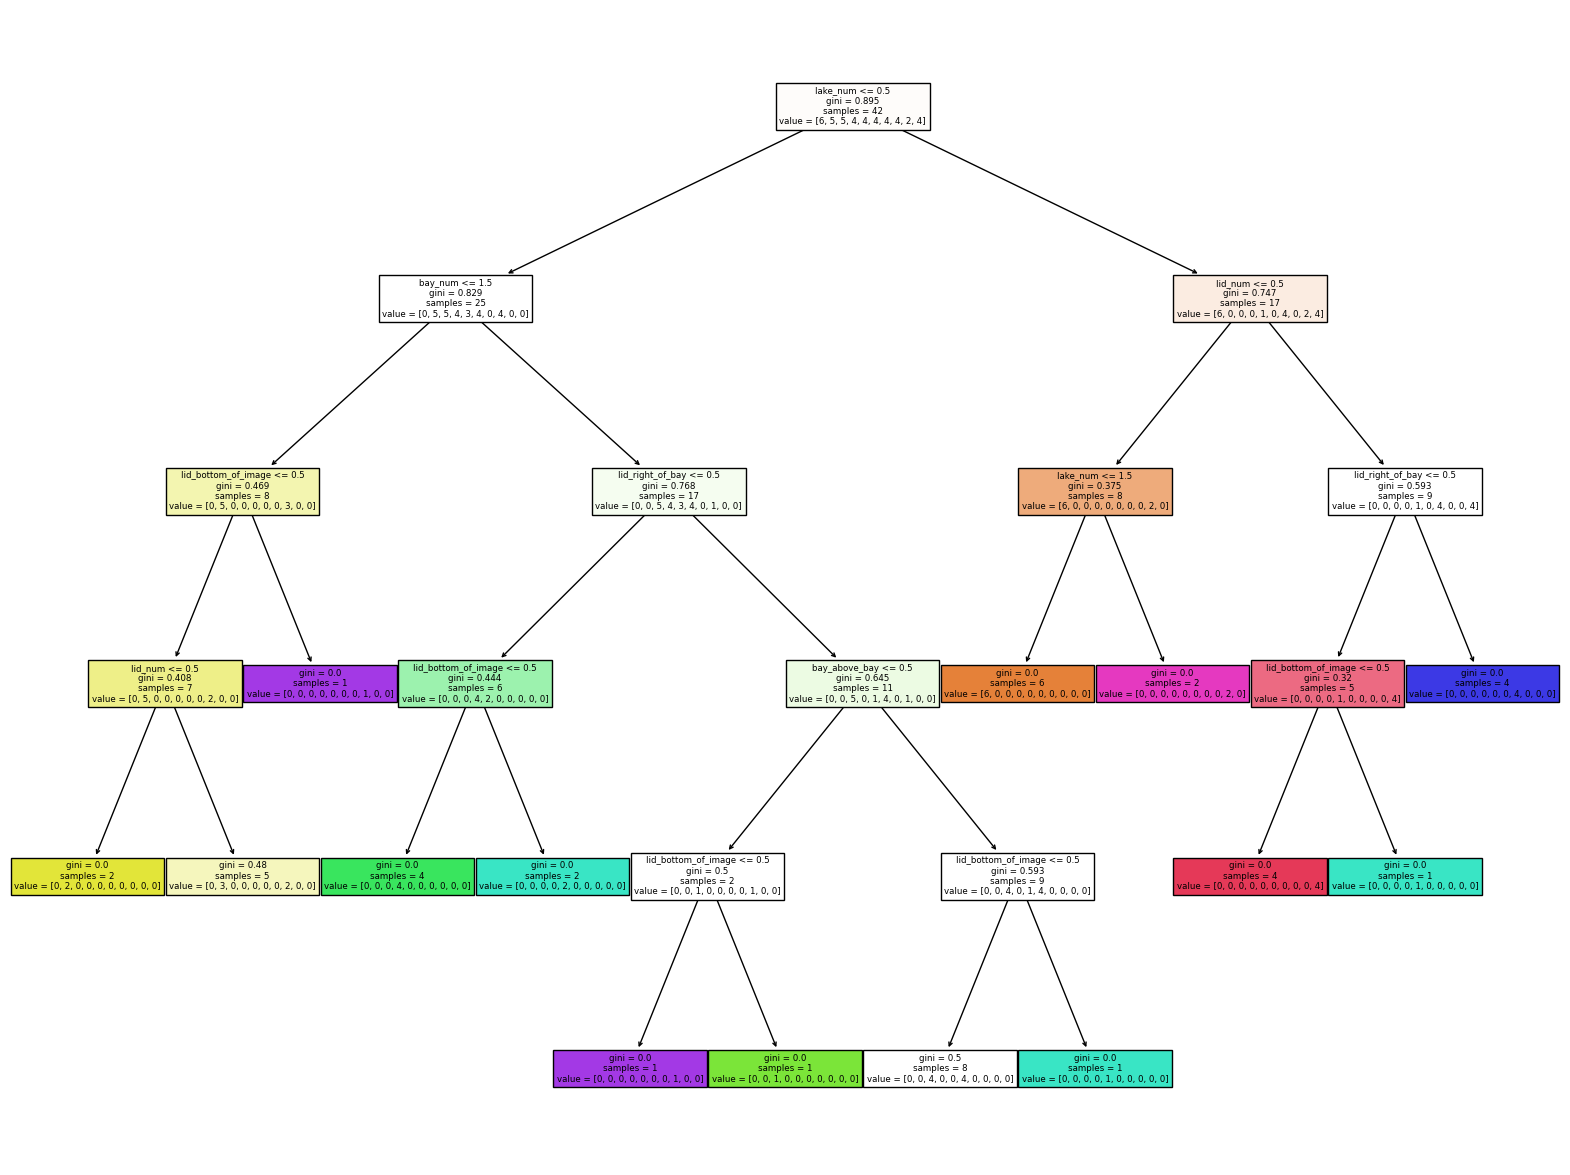

In [24]:
fig = plt.figure(figsize=(20, 15))
_ = tree.plot_tree(dt_clf, 
                  feature_names=["lake_num","bay_num","lid_num","bay_above_bay","lid_right_of_bay","bay_above_lake","lid_bottom_of_image"],
                  filled=True)

In [25]:
dft =df.tail(20)
df_test =df.head(20)
Xf=dft[["lake_num","bay_num","lid_num","bay_above_bay","lid_right_of_bay","bay_above_lake","lid_bottom_of_image"]]
yf=dft["class_bottom_of_image"]
test_X = df_test[["lake_num","bay_num","lid_num","bay_above_bay","lid_right_of_bay","bay_above_lake","lid_bottom_of_image"]]
test_y = df_test["class_bottom_of_image"]

In [26]:
# DecisionTree Classifier 생성
dft_clf = DecisionTreeClassifier(random_state=10)

# DecisionTreeClassifer 학습. 
dft_clf.fit(Xf , yf)

DecisionTreeClassifier(random_state=10)

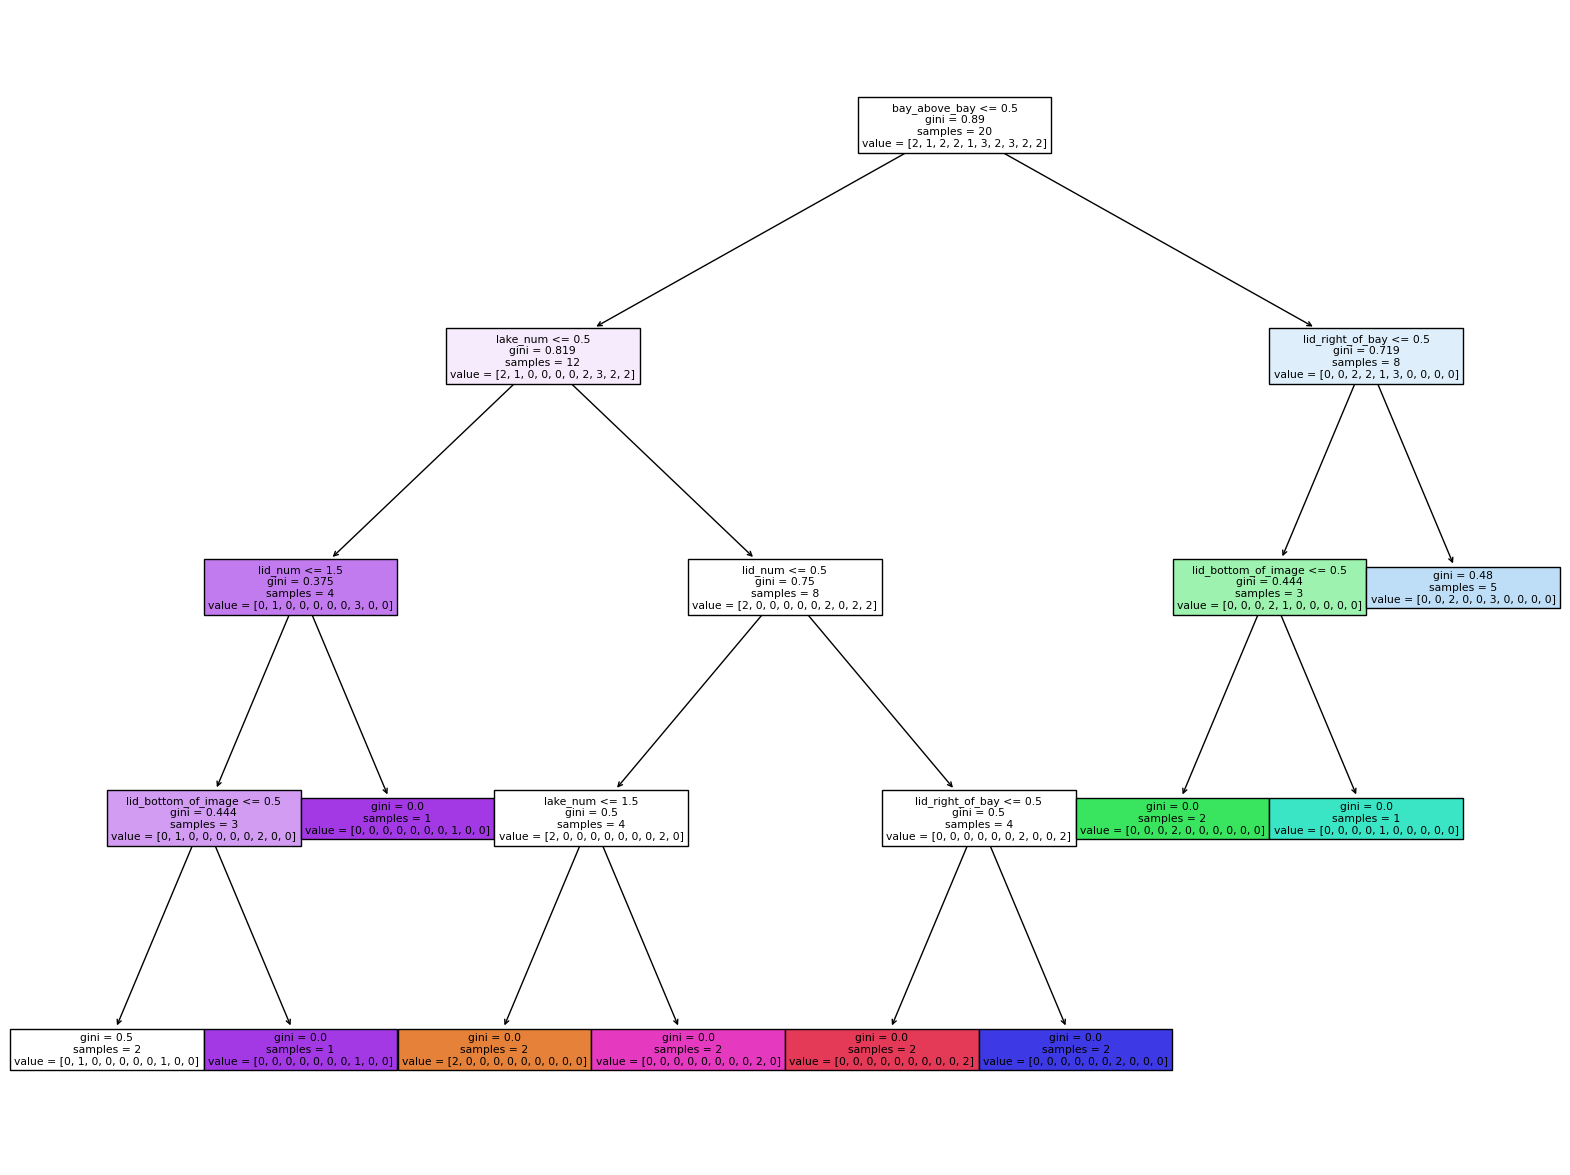

In [27]:
fig = plt.figure(figsize=(20, 15))
_ = tree.plot_tree(dft_clf, 
                  feature_names=["lake_num","bay_num","lid_num","bay_above_bay","lid_right_of_bay","bay_above_lake","lid_bottom_of_image"],
                  filled=True)

In [29]:
preds=dft_clf.predict(test_X)

In [30]:
preds

array([0, 0, 1, 7, 3, 9, 6, 5, 5, 1, 1, 0, 9, 5, 9, 1, 4, 5, 6, 3],
      dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y , preds)
print('정확도: {0:.4f}'.format(accuracy))

정확도: 0.7000


In [ ]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(min_samples_split=1.0, random_state=156)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

preds=dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , preds)
print('정확도: {0:.4f}'.format(accuracy))

In [ ]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

preds=dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , preds)
print('정확도: {0:.4f}'.format(accuracy))

## 2. 보팅 분류기

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression(max_iter = 400)
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft')

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

## 3. 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()